<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_churn_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###carregar dados


In [2]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [3]:
#fazendo uma copy do original
df_churn_train_copy = df_churn_train.copy()

In [4]:
df_churn_train_copy

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [5]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [58]:
df_churn_train[['phoneservice', 'churn']].value_counts()

phoneservice  churn
Yes           0        3719
              1        1363
No            0         420
              1         132
dtype: int64

In [60]:
df_churn_train[['multiplelines']].value_counts()

multiplelines   
No                  2692
Yes                 2390
No phone service     552
dtype: int64

In [57]:
df_churn_train[['internetservice', 'churn']].value_counts()

internetservice  churn
DSL              0        1600
Fiber optic      0        1402
No               0        1137
Fiber optic      1        1049
DSL              1         359
No               1          87
dtype: int64

In [51]:
df_churn_train[['onlinesecurity']].value_counts()

onlinesecurity     
No                     2763
Yes                    1647
No internet service    1224
dtype: int64

In [52]:
df_churn_train[['onlinebackup']].value_counts()

onlinebackup       
No                     2488
Yes                    1922
No internet service    1224
dtype: int64

In [ ]:
#deviceprotection

In [53]:
df_churn_train[['deviceprotection']].value_counts()

deviceprotection   
No                     2480
Yes                    1930
No internet service    1224
dtype: int64

In [ ]:
#techsupport

In [54]:
df_churn_train[['techsupport']].value_counts()

techsupport        
No                     2793
Yes                    1617
No internet service    1224
dtype: int64

In [55]:
#streamingtv
df_churn_train[['streamingtv']].value_counts()

streamingtv        
No                     2240
Yes                    2170
No internet service    1224
dtype: int64

In [56]:
#streamingmovies	
df_churn_train[['streamingmovies']].value_counts()

streamingmovies    
No                     2218
Yes                    2192
No internet service    1224
dtype: int64

In [8]:
df_churn_train[['phoneservice','multiplelines','internetservice']].value_counts()

phoneservice  multiplelines     internetservice
Yes           Yes               Fiber optic        1540
              No                No                  939
                                Fiber optic         911
                                DSL                 842
              Yes               DSL                 565
No            No phone service  DSL                 552
Yes           Yes               No                  285
dtype: int64

In [12]:
df_churn_train[['phoneservice','multiplelines','churn']].value_counts()

phoneservice  multiplelines     churn
Yes           No                0        2011
              Yes               0        1708
                                1         682
              No                1         681
No            No phone service  0         420
                                1         132
dtype: int64

In [30]:
df_churn_train[['contract','churn']].value_counts()

contract        churn
Month-to-month  0        1753
                1        1331
Two year        0        1321
One year        0        1065
                1         127
Two year        1          37
dtype: int64

In [31]:
df_churn_train[['churn','contract']].value_counts()

churn  contract      
0      Month-to-month    1753
1      Month-to-month    1331
0      Two year          1321
       One year          1065
1      One year           127
       Two year            37
dtype: int64

In [46]:
df_churn_train[['churn','paperlessbilling']].value_counts()

churn  paperlessbilling
0      Yes                 2184
       No                  1955
1      Yes                 1128
       No                   367
dtype: int64

In [17]:
df_churn_train[['onlinesecurity']].value_counts()

onlinesecurity     
No                     2763
Yes                    1647
No internet service    1224
dtype: int64

In [18]:
#onlinebackup
df_churn_train[['onlinebackup']].value_counts()

onlinebackup       
No                     2488
Yes                    1922
No internet service    1224
dtype: int64

In [19]:
df_churn_train[['churn','onlinebackup']].value_counts()

churn  onlinebackup       
0      Yes                    1509
       No                     1493
       No internet service    1137
1      No                      995
       Yes                     413
       No internet service      87
dtype: int64

In [16]:
df_churn_train[['churn','onlinesecurity']].value_counts()

churn  onlinesecurity     
0      No                     1589
       Yes                    1413
1      No                     1174
0      No internet service    1137
1      Yes                     234
       No internet service      87
dtype: int64

In [21]:
colunas_df = df_churn_train.columns
colunas_df

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [35]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [29]:
df_churn_train[['internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection','churn' ]].value_counts()

internetservice  onlinesecurity       onlinebackup         deviceprotection     churn
No               No internet service  No internet service  No internet service  0        1137
Fiber optic      No                   No                   No                   1         468
DSL              Yes                  Yes                  Yes                  0         300
Fiber optic      No                   No                   No                   0         287
DSL              No                   No                   No                   0         263
Fiber optic      No                   Yes                  Yes                  0         215
                 Yes                  Yes                  Yes                  0         210
DSL              Yes                  No                   Yes                  0         205
                                                           No                   0         198
Fiber optic      No                   No                   Yes      

 **'id':'id',     'gender':'genero',    'SeniorCitizen':'Idoso', 
 
  'Partner':'TemParceiro',      'Dependents':'TemDependentes',

  'tenure':'MesesNaCompanhia',     'PhoneService':'TemTelefone',

   'MultipleLines':'MaisLinhas',    'InternetService':'TemInternet',

    'OnlineSecurity':'ServicoSegurancaOnline',   

    'OnlineBackup':'ServicoBackupOnline',

    'DeviceProtection':'ServicoProtecaoOnline',

    'TechSupport':'ServicoSuporteOnline',

    'StreamingTV':'ServicoTV',

    'StreamingMovies':'ServicoPctFilmes',

    'Contract':'Contrato',

    'PaperlessBilling':'ContaOnline',

    'PaymentMethod':'MetodoPagamento',

    'MonthlyCharges':'CobrancaMensal',

    'TotalCharges':'CobrancaTotal',

    'Churn':'Churn'**


In [ ]:
#contar a variavel target
df_churn_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

In [ ]:
df_churn_train['churn'].shape

(5634,)

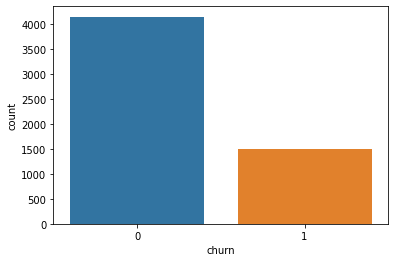

In [ ]:
sns.countplot( x ='churn', data = df_churn_train)

In [ ]:
#percentagem de 0 e 1 da variavel target
df_churn_train['churn'].value_counts()/df_churn_train.shape[0]*100

0    73.464679
1    26.535321
Name: churn, dtype: float64

In [ ]:
#(linhas, colunas) do df
df_churn_train.shape


(5634, 21)

### Missing Values

In [ ]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [ ]:
#identificando os tipos de variaveis missing
df_churn_train[['dependents','tenure','paymentmethod']].dtypes

dependents        object
tenure           float64
paymentmethod     object
dtype: object

###Analise da tenure

Text(0.5, 1.0, 'box tenure')

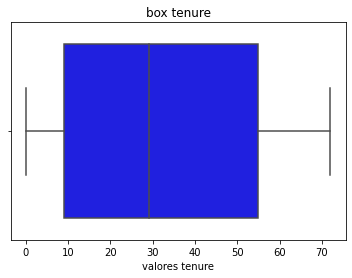

In [ ]:
#plota usando o Seaborn, somente tenure é float

plt.subplot(1,1, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')



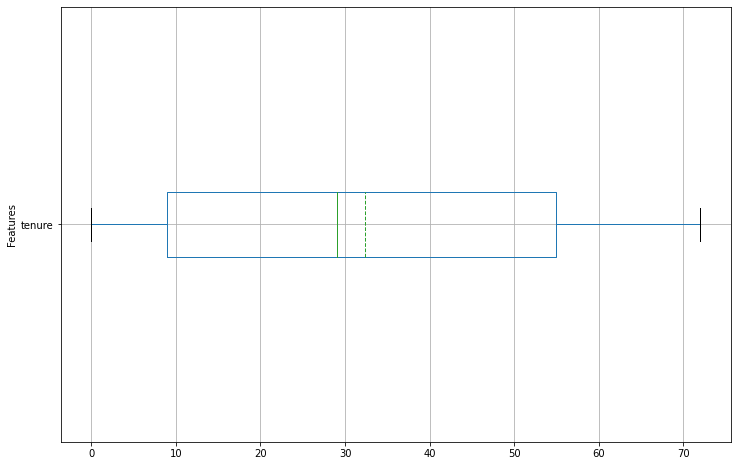

In [ ]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [ ]:
#
df_churn_train[['tenure']]

,tenure
0,56.0
1,NaN
2,60.0
3,37.0
4,29.0
...,...
5629,43.0
5630,NaN
5631,28.0
5632,63.0


In [ ]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [ ]:
#isna para serie e df
df_churn_train['tenure'].isna().sum()

461

In [ ]:
#os isna na tenure 8,18%, substiuir pela mean()
df_churn_train['tenure'].isna().sum()/df_churn_train.shape[0]*100

8.182463613773518

In [ ]:
df_churn_train['tenure'].mean()

32.332882273342356

In [ ]:
df_churn_train[['tenure']].describe()

,tenure
count,5173.000000
mean,32.332882
std,24.463607
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
#29(53); 9 (81); 55(48), substutir por 27
mp_q = (9*81+29*53+55*48)/(53+81+48)
mp_q
                    

26.956043956043956

In [ ]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [ ]:
#substituição dos na por mp_q = 27
df_churn_train['tenure'].fillna(27, inplace = True)

In [ ]:
df_churn_train[df_churn_train['tenure'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
#checa o describe apos o trata na
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,31.896521
std,23.486740
min,0.000000
25%,10.000000
50%,27.000000
75%,53.000000
max,72.000000


**tratar os dependentes**

In [ ]:
df_churn_train[['dependents']]

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [ ]:
#conta os No e Yes
df_churn_train[['dependents']].value_counts()

dependents
No            3793
Yes           1623
dtype: int64

In [ ]:
dependents_na = df_churn_train['dependents'].isna().sum()
dependents_na

218

In [ ]:
#calcula a % excluindo os na
df_churn_train[['dependents']].value_counts()/(df_churn_train.shape[0]-dependents_na)*100

dependents
No            70.033235
Yes           29.966765
dtype: float64

In [ ]:
dependents_na/df_churn_train.shape[0]*100

3.8693645722399714

In [ ]:
na_70_no = dependents_na*0.7
na_70_no

152.6

In [ ]:
na_30_yes = dependents_na*0.3
na_30_yes

65.39999999999999

In [ ]:
#fazendo uam copia do df, feature 'dependents para tratar
df_dependents_trat_na = df_churn_train[['dependents']].copy()
df_dependents_trat_na

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [ ]:
df_dependents_trat_na1 = df_dependents_trat_na[df_dependents_trat_na['dependents'].isna()]
df_dependents_trat_na1

,dependents
73,NaN
89,NaN
110,NaN
156,NaN
179,NaN
...,...
5512,NaN
5522,NaN
5541,NaN
5558,NaN


In [ ]:
df_dependents_trat_na1['dependents'][73]

nan

###testando o prenchimento do NaN na coluna dependents

In [ ]:
#criar uma lista dos index nan na feature dependents
l_index_na_dep = list(df_dependents_trat_na1[df_dependents_trat_na1['dependents'].isna()].index)
l_index_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [ ]:
len(l_index_na_dep)

218

In [ ]:
#tratamento da feature dependents
s = 0
for c in l_index_na_dep:
    s = s + 1  
    if s < 65:
        df_dependents_trat_na1['dependents'][c] = 'Yes'
    else:
        df_dependents_trat_na1['dependents'][c] = 'No'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_dependents_trat_na1.isna().sum()

dependents    0
dtype: int64

In [ ]:
df_dependents_trat_na1[['dependents']].value_counts()/df_dependents_trat_na1.shape[0]

dependents
No            0.706422
Yes           0.293578
dtype: float64

In [ ]:
#df_churn_train['tenure'].fillna(mp_q, inplace = True)
#df_churn_train['dependents'].replace(df_dependents_trat_na1['dependents'], inplace = True)

In [ ]:
#df_churn_train
l_index_churn_na_dep = list(df_churn_train[df_churn_train['dependents'].isna()].index)
l_index_churn_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [ ]:
len(l_index_churn_na_dep)

218

In [ ]:
#tratamento da feature dependents no df_churn_train
s = 0
for c in l_index_churn_na_dep:
    s = s + 1  
    if s < 65:
        df_churn_train['dependents'][c] = 'Yes'
    else:
        df_churn_train['dependents'][c] = 'No'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [ ]:
df_churn_train[df_churn_train['dependents'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


###tratamento da paymentmethod

In [ ]:
#conta a feature
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [ ]:
#conta os Nan na feature
df_churn_train['paymentmethod'].isna().sum()

99

In [ ]:
df_churn_train['paymentmethod'].shape[0]

5634

In [ ]:
#calcula as % para cada forma de pay, excluindo os missing
df_churn_train[['paymentmethod']].value_counts()/(df_churn_train['paymentmethod'].shape[0]-99)*100

paymentmethod            
Electronic check             34.092141
Mailed check                 22.981030
Bank transfer (automatic)    21.897019
Credit card (automatic)      21.029810
dtype: float64

In [ ]:
#% de quanto os missing estão em pay
99/5634*100

1.7571884984025559

In [ ]:
#elect = 32 (16 - M e 16 - f)
99*0.34

33.660000000000004

In [ ]:
#mail = 22(11- M 11 - f)
99*0.2298

22.7502

In [ ]:
#bank = 22
99*0.2189

21.671100000000003

In [ ]:
#cc = 23(12H 11M)
99*0.21


20.79

In [ ]:
#df na feature 'paymentmethod' que tem NaN
df_churn_train[df_churn_train['paymentmethod'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
59,5899,Female,0,Yes,Yes,33.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,NaN,24.15,800.3,0
196,5036,Male,0,No,No,20.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,NaN,78.80,1641.3,0
247,704,Female,0,No,No,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,NaN,20.55,33.6,0
337,5747,Female,0,No,Yes,10.0,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,NaN,81.00,818.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,5150,Female,0,No,No,62.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,NaN,19.20,1123.65,0
5398,6004,Female,0,Yes,No,71.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,NaN,93.20,6506.15,0
5470,2276,Male,0,Yes,Yes,1.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,NaN,74.50,74.5,1
5484,6869,Male,0,No,No,13.0,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,NaN,91.10,1135.7,1


In [ ]:
#captura os index dos NaN numa lista
l_index_na_pay = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_na_pay

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [ ]:
#paymentmethod com o gender
df_churn_train[['paymentmethod', 'gender']].value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Mailed check               Male      657
Bank transfer (automatic)  Female    637
Mailed check               Female    615
Credit card (automatic)    Male      605
Bank transfer (automatic)  Male      575
Credit card (automatic)    Female    559
dtype: int64

In [ ]:
605/(605+559)

0.5197594501718213

In [ ]:
#df de teste para tratar missing
df_pay_trat_na = df_churn_train[['paymentmethod', 'gender']].copy()
df_pay_trat_na


,paymentmethod,gender
0,NaN,Female
1,Mailed check,Male
2,Credit card (automatic),Female
3,Bank transfer (automatic),Female
4,Electronic check,Male
...,...,...
5629,Electronic check,Male
5630,Electronic check,Male
5631,Bank transfer (automatic),Female
5632,Mailed check,Male


In [ ]:
l_index_pay = list(df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()].index)
l_index_pay

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()]

,paymentmethod,gender
0,NaN,Female
59,NaN,Female
196,NaN,Male
247,NaN,Female
337,NaN,Female
...,...,...
5325,NaN,Female
5398,NaN,Female
5470,NaN,Male
5484,NaN,Male


In [ ]:
df_pay_trat_na['gender'][1]

'Male'

In [ ]:
df_pay_trat_na['paymentmethod'][1]

'Mailed check'

In [ ]:
df_pay_trat_na['paymentmethod'][0]

nan

In [ ]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
df_pay_trat_na[['paymentmethod', 'gender']].value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Mailed check               Male      657
Bank transfer (automatic)  Female    637
Mailed check               Female    615
Credit card (automatic)    Male      605
Bank transfer (automatic)  Male      575
Credit card (automatic)    Female    559
dtype: int64

In [ ]:
#tratamento da feature dependents no df_pay_trat_na
b = 0
for c in l_index_pay:
    b = b + 1  
    if b <= 32:
        if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'][c] = 'Electronic check'
        else:
            df_pay_trat_na['paymentmethod'][c] = 'Electronic check'
    if b <= 54:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'][c] = 'Mailed check'
         else:
            df_pay_trat_na['paymentmethod'][c] = 'Mailed check'
    if b <= 77:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'][c] = 'Credit card (automatic)'
         else:
            df_pay_trat_na['paymentmethod'][c] = 'Credit card (automatic)'
    if b <= 99:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'][c] = 'Bank transfer (automatic)'
         else:
            df_pay_trat_na['paymentmethod'][c] = 'Bank transfer (automatic)'


   

In [ ]:
df_pay_trat_na[['paymentmethod', 'gender']].value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Bank transfer (automatic)  Female    687
Mailed check               Male      657
Bank transfer (automatic)  Male      624
Mailed check               Female    615
Credit card (automatic)    Male      605
                           Female    559
dtype: int64

In [ ]:
l_index_pay_c1 = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c1

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
df_churn_train[['paymentmethod', 'gender']].tail(94)

,paymentmethod,gender
5540,Bank transfer (automatic),Female
5541,Credit card (automatic),Female
5542,NaN,Male
5543,Credit card (automatic),Female
5544,Bank transfer (automatic),Male
...,...,...
5629,Electronic check,Male
5630,Electronic check,Male
5631,Bank transfer (automatic),Female
5632,Mailed check,Male


In [ ]:
#resultado do preenchimento
df_pay_trat_na.isna().sum()

paymentmethod    0
gender           0
dtype: int64

In [ ]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [ ]:
df_pay_trat_na['paymentmethod'][0]

'Bank transfer (automatic)'

In [ ]:
df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()]

,paymentmethod,gender


In [ ]:
df_pay_trat_na.value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Bank transfer (automatic)  Female    687
Mailed check               Male      657
Bank transfer (automatic)  Male      624
Mailed check               Female    615
Credit card (automatic)    Male      605
                           Female    559
dtype: int64

In [ ]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [ ]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [ ]:
#tratamento da feature dependents no df_churn_train
b = 0
for c in l_index_pay_c:
    b = b + 1  
    if b <= 32:
        if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Electronic check'
        else:
            df_churn_train['paymentmethod'][c] = 'Electronic check'
    if b <= 54:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Mailed check'
         else:
            df_churn_train['paymentmethod'][c] = 'Mailed check'
    if b <= 77:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Credit card (automatic)'
         else:
            df_churn_train['paymentmethod'][c] = 'Credit card (automatic)'
    if b <= 99:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'][c] = 'Bank transfer (automatic)'
         else:
            df_churn_train['paymentmethod'][c] = 'Bank transfer (automatic)'




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWith

In [ ]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Bank transfer (automatic)    1311
Mailed check                 1272
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_churn_train

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.1,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,27.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [ ]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [ ]:
df_churn_train[['totalcharges']]


,totalcharges
0,2560.1
1,332.65
2,6640.7
3,3545.35
4,1974.8
...,...
5629,1931.3
5630,4903.2
5631,1517.5
5632,1573.05


In [ ]:
df_to_trat = df_churn_train[['tenure', 'totalcharges']].copy()

In [ ]:
df_to_trat

,tenure,totalcharges
0,56.0,2560.1
1,27.0,332.65
2,60.0,6640.7
3,37.0,3545.35
4,29.0,1974.8
...,...,...
5629,43.0,1931.3
5630,27.0,4903.2
5631,28.0,1517.5
5632,63.0,1573.05


In [ ]:
df_to_trat['totalcharges'] = df_to_trat['totalcharges'].str.replace(',', '.')


In [ ]:
df_to_trat

,tenure,totalcharges
0,56.0,2560.1
1,27.0,332.65
2,60.0,6640.7
3,37.0,3545.35
4,29.0,1974.8
...,...,...
5629,43.0,1931.3
5630,27.0,4903.2
5631,28.0,1517.5
5632,63.0,1573.05


In [ ]:
df_to_trat['totalcharges'] = pd.to_numeric(df_to_trat['totalcharges'], errors= 'coerce')

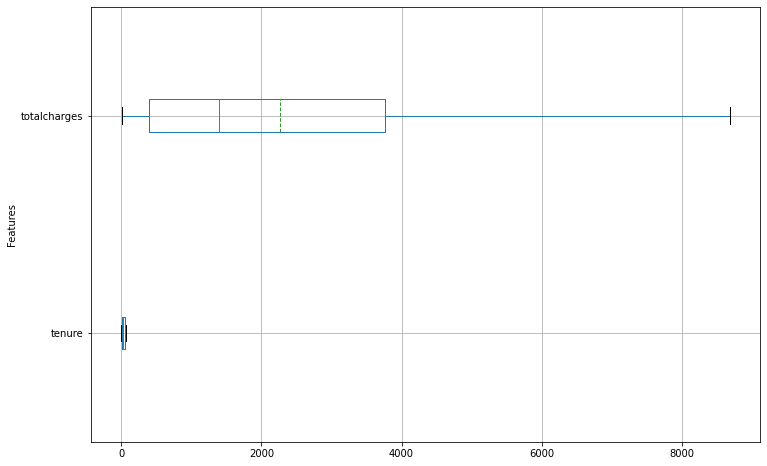

In [ ]:
df_to_trat[['tenure','totalcharges']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [ ]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.10,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


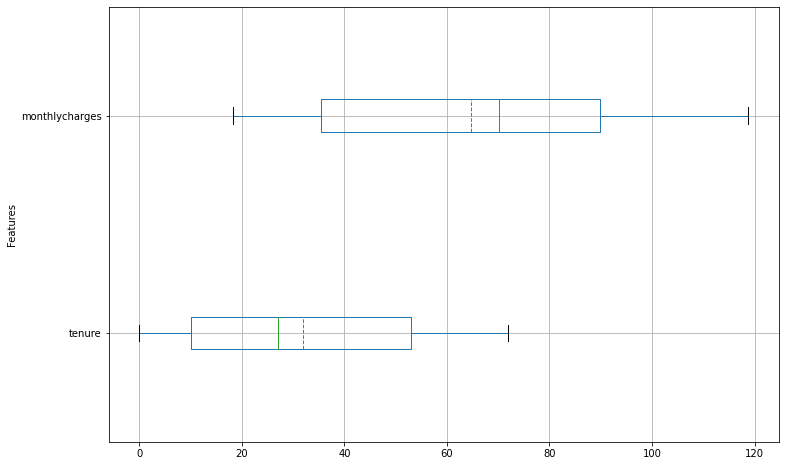

In [ ]:
df_churn_train[['tenure','monthlycharges']].plot(kind = 'box', showmeans = True,
                                                                meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

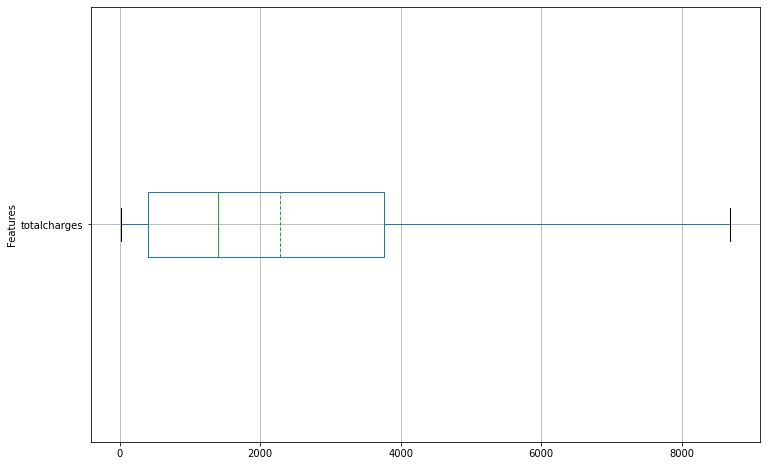

In [ ]:
df_churn_train[['totalcharges']].plot(kind = 'box', showmeans = True,
                                                                meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [ ]:
df_churn_train

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),45.05,2560.10,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.30,0
5630,604,Male,0,No,No,27.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.20,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.50,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [ ]:
df_churn_train[['gender']].value_counts()

gender
Male      2849
Female    2785
dtype: int64

In [ ]:
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Bank transfer (automatic)    1311
Mailed check                 1272
Credit card (automatic)      1164
dtype: int64